In [1]:
from google.colab import drive 
import os
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Internship/"
os.chdir(path)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import math
import pickle
import datetime

from utilsOT import *
from algos import *

Mounted at /content/drive


# v (eps = 0.001, 0.01, 0.1)

In [ ]:
n_iter = 200000
list_epsilon = [0.001,0.01,0.1]
list_alpha = [0.1,0.2,0.5]

In [ ]:
def run_v(start, end):
    for seed in range(start, end):
        if seed % 10 == 0:
            print('============= from '+str(seed)+' to '+str(seed+10)+' =============')
        
        np.random.seed(seed)

        n_target = np.random.randint(2,20)
        n_source = np.random.randint(2,20)

        rho_list_target = generate_list_rho(3)
        rho_list_source = generate_list_rho(3)

        X_target = sample_rho_batch(rho_list_target,n_target)
        nu = np.random.rand(n_target)
        nu = nu/np.sum(nu) 

        X_source = sample_rho_batch(rho_list_source,n_source)
        mu = np.random.rand(n_source)
        mu = mu/np.sum(mu)

        v1 = np.zeros([n_target,n_iter,len(list_epsilon)])
        v2 = np.zeros([n_source,n_iter,len(list_epsilon)])
        v3 = np.zeros([n_target,n_iter,len(list_epsilon)])

        for i_e in range(len(list_epsilon)):
            t0 = datetime.datetime.now()
            
            epsilon = list_epsilon[i_e]
            alpha = list_alpha[i_e]

            v1[:,:,i_e] = runASGD_discrete(nu,mu,X_target,X_source,epsilon,alpha,n_iter)
            v2[:,:,i_e] = runASGD_discrete(mu,mu,X_source,X_source,epsilon,alpha,n_iter)
            v3[:,:,i_e] = runASGD_discrete(nu,nu,X_target,X_target,epsilon,alpha,n_iter)
            
            t1 = datetime.datetime.now()
            print('v1, v2, v3, epsilon = '+str(epsilon)+', seed = '+str(seed)+', time = '+str((t1-t0).seconds))
        
        np.save('permanent/result/S_discrete_eps_cst_ASGD/v1_seed_'+str(seed)+'.npy',v1)
        np.save('permanent/result/S_discrete_eps_cst_ASGD/v2_seed_'+str(seed)+'.npy',v2)
        np.save('permanent/result/S_discrete_eps_cst_ASGD/v3_seed_'+str(seed)+'.npy',v3)

In [ ]:
run_v(0,10)

============= from 0 to 10 =============
v1, v2, v3, epsilon = 0.001, seed = 0, time = 56
v1, v2, v3, epsilon = 0.01, seed = 0, time = 58
v1, v2, v3, epsilon = 0.1, seed = 0, time = 57
v1, v2, v3, epsilon = 0.001, seed = 1, time = 61
v1, v2, v3, epsilon = 0.01, seed = 1, time = 55
v1, v2, v3, epsilon = 0.1, seed = 1, time = 53
v1, v2, v3, epsilon = 0.001, seed = 2, time = 56
v1, v2, v3, epsilon = 0.01, seed = 2, time = 54
v1, v2, v3, epsilon = 0.1, seed = 2, time = 56
v1, v2, v3, epsilon = 0.001, seed = 3, time = 58
v1, v2, v3, epsilon = 0.01, seed = 3, time = 54
v1, v2, v3, epsilon = 0.1, seed = 3, time = 54
v1, v2, v3, epsilon = 0.001, seed = 4, time = 56
v1, v2, v3, epsilon = 0.01, seed = 4, time = 54
v1, v2, v3, epsilon = 0.1, seed = 4, time = 54
v1, v2, v3, epsilon = 0.001, seed = 5, time = 54
v1, v2, v3, epsilon = 0.01, seed = 5, time = 53
v1, v2, v3, epsilon = 0.1, seed = 5, time = 53
v1, v2, v3, epsilon = 0.001, seed = 6, time = 54
v1, v2, v3, epsilon = 0.01, seed = 6, time = 5

In [ ]:
run_v(10,20)

============= from 10 to 20 =============
v1, v2, v3, epsilon = 0.001, seed = 10, time = 56
v1, v2, v3, epsilon = 0.01, seed = 10, time = 53
v1, v2, v3, epsilon = 0.1, seed = 10, time = 52
v1, v2, v3, epsilon = 0.001, seed = 11, time = 60
v1, v2, v3, epsilon = 0.01, seed = 11, time = 54
v1, v2, v3, epsilon = 0.1, seed = 11, time = 54
v1, v2, v3, epsilon = 0.001, seed = 12, time = 55
v1, v2, v3, epsilon = 0.01, seed = 12, time = 53
v1, v2, v3, epsilon = 0.1, seed = 12, time = 54
v1, v2, v3, epsilon = 0.001, seed = 13, time = 56
v1, v2, v3, epsilon = 0.01, seed = 13, time = 53
v1, v2, v3, epsilon = 0.1, seed = 13, time = 53
v1, v2, v3, epsilon = 0.001, seed = 14, time = 55
v1, v2, v3, epsilon = 0.01, seed = 14, time = 54
v1, v2, v3, epsilon = 0.1, seed = 14, time = 55
v1, v2, v3, epsilon = 0.001, seed = 15, time = 57
v1, v2, v3, epsilon = 0.01, seed = 15, time = 56
v1, v2, v3, epsilon = 0.1, seed = 15, time = 54
v1, v2, v3, epsilon = 0.001, seed = 16, time = 58
v1, v2, v3, epsilon = 0.01

In [ ]:
run_v(20,30)

============= from 20 to 30 =============
v1, v2, v3, epsilon = 0.001, seed = 20, time = 55
v1, v2, v3, epsilon = 0.01, seed = 20, time = 54
v1, v2, v3, epsilon = 0.1, seed = 20, time = 56
v1, v2, v3, epsilon = 0.001, seed = 21, time = 60
v1, v2, v3, epsilon = 0.01, seed = 21, time = 56
v1, v2, v3, epsilon = 0.1, seed = 21, time = 58
v1, v2, v3, epsilon = 0.001, seed = 22, time = 57
v1, v2, v3, epsilon = 0.01, seed = 22, time = 54
v1, v2, v3, epsilon = 0.1, seed = 22, time = 54
v1, v2, v3, epsilon = 0.001, seed = 23, time = 59
v1, v2, v3, epsilon = 0.01, seed = 23, time = 58
v1, v2, v3, epsilon = 0.1, seed = 23, time = 57
v1, v2, v3, epsilon = 0.001, seed = 24, time = 55
v1, v2, v3, epsilon = 0.01, seed = 24, time = 55
v1, v2, v3, epsilon = 0.1, seed = 24, time = 54
v1, v2, v3, epsilon = 0.001, seed = 25, time = 55
v1, v2, v3, epsilon = 0.01, seed = 25, time = 55
v1, v2, v3, epsilon = 0.1, seed = 25, time = 57
v1, v2, v3, epsilon = 0.001, seed = 26, time = 57
v1, v2, v3, epsilon = 0.01

In [ ]:
run_v(30,40)

============= from 30 to 40 =============
v1, v2, v3, epsilon = 0.001, seed = 30, time = 57
v1, v2, v3, epsilon = 0.01, seed = 30, time = 52
v1, v2, v3, epsilon = 0.1, seed = 30, time = 55
v1, v2, v3, epsilon = 0.001, seed = 31, time = 56
v1, v2, v3, epsilon = 0.01, seed = 31, time = 54
v1, v2, v3, epsilon = 0.1, seed = 31, time = 54
v1, v2, v3, epsilon = 0.001, seed = 32, time = 56
v1, v2, v3, epsilon = 0.01, seed = 32, time = 55
v1, v2, v3, epsilon = 0.1, seed = 32, time = 55
v1, v2, v3, epsilon = 0.001, seed = 33, time = 54
v1, v2, v3, epsilon = 0.01, seed = 33, time = 54
v1, v2, v3, epsilon = 0.1, seed = 33, time = 57
v1, v2, v3, epsilon = 0.001, seed = 34, time = 53
v1, v2, v3, epsilon = 0.01, seed = 34, time = 52
v1, v2, v3, epsilon = 0.1, seed = 34, time = 53
v1, v2, v3, epsilon = 0.001, seed = 35, time = 54
v1, v2, v3, epsilon = 0.01, seed = 35, time = 54
v1, v2, v3, epsilon = 0.1, seed = 35, time = 52
v1, v2, v3, epsilon = 0.001, seed = 36, time = 53
v1, v2, v3, epsilon = 0.01

In [ ]:
run_v(40,50)

============= from 40 to 50 =============
v1, v2, v3, epsilon = 0.001, seed = 40, time = 51
v1, v2, v3, epsilon = 0.01, seed = 40, time = 50
v1, v2, v3, epsilon = 0.1, seed = 40, time = 51
v1, v2, v3, epsilon = 0.001, seed = 41, time = 49
v1, v2, v3, epsilon = 0.01, seed = 41, time = 49
v1, v2, v3, epsilon = 0.1, seed = 41, time = 49
v1, v2, v3, epsilon = 0.001, seed = 42, time = 51
v1, v2, v3, epsilon = 0.01, seed = 42, time = 49
v1, v2, v3, epsilon = 0.1, seed = 42, time = 50
v1, v2, v3, epsilon = 0.001, seed = 43, time = 50
v1, v2, v3, epsilon = 0.01, seed = 43, time = 49
v1, v2, v3, epsilon = 0.1, seed = 43, time = 49
v1, v2, v3, epsilon = 0.001, seed = 44, time = 50
v1, v2, v3, epsilon = 0.01, seed = 44, time = 50
v1, v2, v3, epsilon = 0.1, seed = 44, time = 50
v1, v2, v3, epsilon = 0.001, seed = 45, time = 51
v1, v2, v3, epsilon = 0.01, seed = 45, time = 50
v1, v2, v3, epsilon = 0.1, seed = 45, time = 49
v1, v2, v3, epsilon = 0.001, seed = 46, time = 50
v1, v2, v3, epsilon = 0.01

In [ ]:
run_v(50,60)

============= from 50 to 60 =============
v1, v2, v3, epsilon = 0.001, seed = 50, time = 51
v1, v2, v3, epsilon = 0.01, seed = 50, time = 49
v1, v2, v3, epsilon = 0.1, seed = 50, time = 49
v1, v2, v3, epsilon = 0.001, seed = 51, time = 51
v1, v2, v3, epsilon = 0.01, seed = 51, time = 49
v1, v2, v3, epsilon = 0.1, seed = 51, time = 49
v1, v2, v3, epsilon = 0.001, seed = 52, time = 52
v1, v2, v3, epsilon = 0.01, seed = 52, time = 50
v1, v2, v3, epsilon = 0.1, seed = 52, time = 50
v1, v2, v3, epsilon = 0.001, seed = 53, time = 51
v1, v2, v3, epsilon = 0.01, seed = 53, time = 50
v1, v2, v3, epsilon = 0.1, seed = 53, time = 49
v1, v2, v3, epsilon = 0.001, seed = 54, time = 52
v1, v2, v3, epsilon = 0.01, seed = 54, time = 50
v1, v2, v3, epsilon = 0.1, seed = 54, time = 51
v1, v2, v3, epsilon = 0.001, seed = 55, time = 51
v1, v2, v3, epsilon = 0.01, seed = 55, time = 50
v1, v2, v3, epsilon = 0.1, seed = 55, time = 50
v1, v2, v3, epsilon = 0.001, seed = 56, time = 52
v1, v2, v3, epsilon = 0.01

In [ ]:
run_v(60,70)

============= from 60 to 70 =============
v1, v2, v3, epsilon = 0.001, seed = 60, time = 52
v1, v2, v3, epsilon = 0.01, seed = 60, time = 54
v1, v2, v3, epsilon = 0.1, seed = 60, time = 49
v1, v2, v3, epsilon = 0.001, seed = 61, time = 50
v1, v2, v3, epsilon = 0.01, seed = 61, time = 49
v1, v2, v3, epsilon = 0.1, seed = 61, time = 49
v1, v2, v3, epsilon = 0.001, seed = 62, time = 51
v1, v2, v3, epsilon = 0.01, seed = 62, time = 52
v1, v2, v3, epsilon = 0.1, seed = 62, time = 50
v1, v2, v3, epsilon = 0.001, seed = 63, time = 52
v1, v2, v3, epsilon = 0.01, seed = 63, time = 51
v1, v2, v3, epsilon = 0.1, seed = 63, time = 50
v1, v2, v3, epsilon = 0.001, seed = 64, time = 51
v1, v2, v3, epsilon = 0.01, seed = 64, time = 49
v1, v2, v3, epsilon = 0.1, seed = 64, time = 49
v1, v2, v3, epsilon = 0.001, seed = 65, time = 51
v1, v2, v3, epsilon = 0.01, seed = 65, time = 50
v1, v2, v3, epsilon = 0.1, seed = 65, time = 50
v1, v2, v3, epsilon = 0.001, seed = 66, time = 54
v1, v2, v3, epsilon = 0.01

In [ ]:
run_v(70,80)

============= from 70 to 80 =============
v1, v2, v3, epsilon = 0.001, seed = 70, time = 54
v1, v2, v3, epsilon = 0.01, seed = 70, time = 49
v1, v2, v3, epsilon = 0.1, seed = 70, time = 54
v1, v2, v3, epsilon = 0.001, seed = 71, time = 51
v1, v2, v3, epsilon = 0.01, seed = 71, time = 51
v1, v2, v3, epsilon = 0.1, seed = 71, time = 50
v1, v2, v3, epsilon = 0.001, seed = 72, time = 51
v1, v2, v3, epsilon = 0.01, seed = 72, time = 49
v1, v2, v3, epsilon = 0.1, seed = 72, time = 50
v1, v2, v3, epsilon = 0.001, seed = 73, time = 51
v1, v2, v3, epsilon = 0.01, seed = 73, time = 51
v1, v2, v3, epsilon = 0.1, seed = 73, time = 49
v1, v2, v3, epsilon = 0.001, seed = 74, time = 54
v1, v2, v3, epsilon = 0.01, seed = 74, time = 50
v1, v2, v3, epsilon = 0.1, seed = 74, time = 50
v1, v2, v3, epsilon = 0.001, seed = 75, time = 51
v1, v2, v3, epsilon = 0.01, seed = 75, time = 50
v1, v2, v3, epsilon = 0.1, seed = 75, time = 50
v1, v2, v3, epsilon = 0.001, seed = 76, time = 50
v1, v2, v3, epsilon = 0.01

In [ ]:
run_v(80,90)

============= from 80 to 90 =============
v1, v2, v3, epsilon = 0.001, seed = 80, time = 51
v1, v2, v3, epsilon = 0.01, seed = 80, time = 50
v1, v2, v3, epsilon = 0.1, seed = 80, time = 50
v1, v2, v3, epsilon = 0.001, seed = 81, time = 50
v1, v2, v3, epsilon = 0.01, seed = 81, time = 50
v1, v2, v3, epsilon = 0.1, seed = 81, time = 53
v1, v2, v3, epsilon = 0.001, seed = 82, time = 51
v1, v2, v3, epsilon = 0.01, seed = 82, time = 50
v1, v2, v3, epsilon = 0.1, seed = 82, time = 49
v1, v2, v3, epsilon = 0.001, seed = 83, time = 50
v1, v2, v3, epsilon = 0.01, seed = 83, time = 51
v1, v2, v3, epsilon = 0.1, seed = 83, time = 50
v1, v2, v3, epsilon = 0.001, seed = 84, time = 51
v1, v2, v3, epsilon = 0.01, seed = 84, time = 50
v1, v2, v3, epsilon = 0.1, seed = 84, time = 50
v1, v2, v3, epsilon = 0.001, seed = 85, time = 50
v1, v2, v3, epsilon = 0.01, seed = 85, time = 50
v1, v2, v3, epsilon = 0.1, seed = 85, time = 52
v1, v2, v3, epsilon = 0.001, seed = 86, time = 51
v1, v2, v3, epsilon = 0.01

In [ ]:
run_v(90,100)

============= from 90 to 100 =============
v1, v2, v3, epsilon = 0.001, seed = 90, time = 50
v1, v2, v3, epsilon = 0.01, seed = 90, time = 50
v1, v2, v3, epsilon = 0.1, seed = 90, time = 49
v1, v2, v3, epsilon = 0.001, seed = 91, time = 52
v1, v2, v3, epsilon = 0.01, seed = 91, time = 50
v1, v2, v3, epsilon = 0.1, seed = 91, time = 49
v1, v2, v3, epsilon = 0.001, seed = 92, time = 50
v1, v2, v3, epsilon = 0.01, seed = 92, time = 49
v1, v2, v3, epsilon = 0.1, seed = 92, time = 50
v1, v2, v3, epsilon = 0.001, seed = 93, time = 51
v1, v2, v3, epsilon = 0.01, seed = 93, time = 52
v1, v2, v3, epsilon = 0.1, seed = 93, time = 49
v1, v2, v3, epsilon = 0.001, seed = 94, time = 50
v1, v2, v3, epsilon = 0.01, seed = 94, time = 49
v1, v2, v3, epsilon = 0.1, seed = 94, time = 49
v1, v2, v3, epsilon = 0.001, seed = 95, time = 52
v1, v2, v3, epsilon = 0.01, seed = 95, time = 49
v1, v2, v3, epsilon = 0.1, seed = 95, time = 50
v1, v2, v3, epsilon = 0.001, seed = 96, time = 51
v1, v2, v3, epsilon = 0.0

# v (eps = 0)

In [ ]:
n_iter = 200000
epsilon = 0
alpha = 0.1

In [ ]:
def run_v_0(start, end):
    for seed in range(start, end):
        if seed % 10 == 0:
            print('============= from '+str(seed)+' to '+str(seed+10)+' =============')
        
        np.random.seed(seed)

        n_target = np.random.randint(2,20)
        n_source = np.random.randint(2,20)

        rho_list_target = generate_list_rho(3)
        rho_list_source = generate_list_rho(3)

        X_target = sample_rho_batch(rho_list_target,n_target)
        nu = np.random.rand(n_target)
        nu = nu/np.sum(nu) 

        X_source = sample_rho_batch(rho_list_source,n_source)
        mu = np.random.rand(n_source)
        mu = mu/np.sum(mu)

        v1 = np.zeros([n_target,n_iter,4])
        v2 = np.zeros([n_source,n_iter,4])
        v3 = np.zeros([n_target,n_iter,4])

        v1[:,:,1:] = np.load('permanent/result/S_discrete_eps_cst_ASGD/v1_seed_'+str(seed)+'.npy')
        v2[:,:,1:] = np.load('permanent/result/S_discrete_eps_cst_ASGD/v2_seed_'+str(seed)+'.npy')
        v3[:,:,1:] = np.load('permanent/result/S_discrete_eps_cst_ASGD/v3_seed_'+str(seed)+'.npy')

        t0 = datetime.datetime.now()

        v1[:,:,0] = runASGD_discrete(nu,mu,X_target,X_source,epsilon,alpha,n_iter)
        v2[:,:,0] = runASGD_discrete(mu,mu,X_source,X_source,epsilon,alpha,n_iter)
        v3[:,:,0] = runASGD_discrete(nu,nu,X_target,X_target,epsilon,alpha,n_iter)
        
        t1 = datetime.datetime.now()
        print('v1, v2, v3, epsilon = '+str(epsilon)+', seed = '+str(seed)+', time = '+str((t1-t0).seconds))
        
        np.save('permanent/result/S_discrete_eps_cst_ASGD/v1_seed_'+str(seed)+'.npy',v1)
        np.save('permanent/result/S_discrete_eps_cst_ASGD/v2_seed_'+str(seed)+'.npy',v2)
        np.save('permanent/result/S_discrete_eps_cst_ASGD/v3_seed_'+str(seed)+'.npy',v3)

In [ ]:
run_v_0(0,10)

============= from 0 to 10 =============
v1, v2, v3, epsilon = 0, seed = 0, time = 464
v1, v2, v3, epsilon = 0, seed = 1, time = 471
v1, v2, v3, epsilon = 0, seed = 2, time = 472
v1, v2, v3, epsilon = 0, seed = 3, time = 469
v1, v2, v3, epsilon = 0, seed = 4, time = 465
v1, v2, v3, epsilon = 0, seed = 5, time = 484
v1, v2, v3, epsilon = 0, seed = 6, time = 477
v1, v2, v3, epsilon = 0, seed = 7, time = 459
v1, v2, v3, epsilon = 0, seed = 8, time = 428
v1, v2, v3, epsilon = 0, seed = 9, time = 418


In [ ]:
run_v_0(10,20)

============= from 10 to 20 =============
v1, v2, v3, epsilon = 0, seed = 10, time = 476
v1, v2, v3, epsilon = 0, seed = 11, time = 473
v1, v2, v3, epsilon = 0, seed = 12, time = 477
v1, v2, v3, epsilon = 0, seed = 13, time = 474
v1, v2, v3, epsilon = 0, seed = 14, time = 475
v1, v2, v3, epsilon = 0, seed = 15, time = 474
v1, v2, v3, epsilon = 0, seed = 16, time = 472
v1, v2, v3, epsilon = 0, seed = 17, time = 480
v1, v2, v3, epsilon = 0, seed = 18, time = 481
v1, v2, v3, epsilon = 0, seed = 19, time = 473


In [ ]:
run_v_0(20,30)

============= from 20 to 30 =============
v1, v2, v3, epsilon = 0, seed = 20, time = 478
v1, v2, v3, epsilon = 0, seed = 21, time = 474
v1, v2, v3, epsilon = 0, seed = 22, time = 477
v1, v2, v3, epsilon = 0, seed = 23, time = 472
v1, v2, v3, epsilon = 0, seed = 24, time = 471
v1, v2, v3, epsilon = 0, seed = 25, time = 458
v1, v2, v3, epsilon = 0, seed = 26, time = 457
v1, v2, v3, epsilon = 0, seed = 27, time = 456
v1, v2, v3, epsilon = 0, seed = 28, time = 455
v1, v2, v3, epsilon = 0, seed = 29, time = 449


In [ ]:
run_v_0(30,40)

============= from 30 to 40 =============
v1, v2, v3, epsilon = 0, seed = 30, time = 555
v1, v2, v3, epsilon = 0, seed = 31, time = 545
v1, v2, v3, epsilon = 0, seed = 32, time = 559
v1, v2, v3, epsilon = 0, seed = 33, time = 553
v1, v2, v3, epsilon = 0, seed = 34, time = 553
v1, v2, v3, epsilon = 0, seed = 35, time = 552
v1, v2, v3, epsilon = 0, seed = 36, time = 550
v1, v2, v3, epsilon = 0, seed = 37, time = 533
v1, v2, v3, epsilon = 0, seed = 38, time = 522
v1, v2, v3, epsilon = 0, seed = 39, time = 516


In [ ]:
run_v_0(40,50)

============= from 40 to 50 =============
v1, v2, v3, epsilon = 0, seed = 40, time = 511
v1, v2, v3, epsilon = 0, seed = 41, time = 507
v1, v2, v3, epsilon = 0, seed = 42, time = 507
v1, v2, v3, epsilon = 0, seed = 43, time = 505
v1, v2, v3, epsilon = 0, seed = 44, time = 505
v1, v2, v3, epsilon = 0, seed = 45, time = 515
v1, v2, v3, epsilon = 0, seed = 46, time = 511
v1, v2, v3, epsilon = 0, seed = 47, time = 512
v1, v2, v3, epsilon = 0, seed = 48, time = 495
v1, v2, v3, epsilon = 0, seed = 49, time = 488


In [ ]:
run_v_0(50,60)

============= from 50 to 60 =============
v1, v2, v3, epsilon = 0, seed = 50, time = 506
v1, v2, v3, epsilon = 0, seed = 51, time = 501
v1, v2, v3, epsilon = 0, seed = 52, time = 502
v1, v2, v3, epsilon = 0, seed = 53, time = 506
v1, v2, v3, epsilon = 0, seed = 54, time = 509
v1, v2, v3, epsilon = 0, seed = 55, time = 507
v1, v2, v3, epsilon = 0, seed = 56, time = 505
v1, v2, v3, epsilon = 0, seed = 57, time = 509
v1, v2, v3, epsilon = 0, seed = 58, time = 493
v1, v2, v3, epsilon = 0, seed = 59, time = 490


In [ ]:
run_v_0(60,70)

============= from 60 to 70 =============
v1, v2, v3, epsilon = 0, seed = 60, time = 448
v1, v2, v3, epsilon = 0, seed = 61, time = 413
v1, v2, v3, epsilon = 0, seed = 62, time = 405
v1, v2, v3, epsilon = 0, seed = 63, time = 411
v1, v2, v3, epsilon = 0, seed = 64, time = 414
v1, v2, v3, epsilon = 0, seed = 65, time = 408
v1, v2, v3, epsilon = 0, seed = 66, time = 408
v1, v2, v3, epsilon = 0, seed = 67, time = 416
v1, v2, v3, epsilon = 0, seed = 68, time = 412
v1, v2, v3, epsilon = 0, seed = 69, time = 409


In [ ]:
run_v_0(70,80)

============= from 70 to 80 =============
v1, v2, v3, epsilon = 0, seed = 70, time = 511
v1, v2, v3, epsilon = 0, seed = 71, time = 501
v1, v2, v3, epsilon = 0, seed = 72, time = 494
v1, v2, v3, epsilon = 0, seed = 73, time = 490
v1, v2, v3, epsilon = 0, seed = 74, time = 490
v1, v2, v3, epsilon = 0, seed = 75, time = 490
v1, v2, v3, epsilon = 0, seed = 76, time = 494
v1, v2, v3, epsilon = 0, seed = 77, time = 489
v1, v2, v3, epsilon = 0, seed = 78, time = 502
v1, v2, v3, epsilon = 0, seed = 79, time = 491


In [ ]:
run_v_0(80,90)

============= from 80 to 90 =============
v1, v2, v3, epsilon = 0, seed = 80, time = 504
v1, v2, v3, epsilon = 0, seed = 81, time = 500
v1, v2, v3, epsilon = 0, seed = 82, time = 491
v1, v2, v3, epsilon = 0, seed = 83, time = 492
v1, v2, v3, epsilon = 0, seed = 84, time = 491
v1, v2, v3, epsilon = 0, seed = 85, time = 492
v1, v2, v3, epsilon = 0, seed = 86, time = 493
v1, v2, v3, epsilon = 0, seed = 87, time = 489
v1, v2, v3, epsilon = 0, seed = 88, time = 495
v1, v2, v3, epsilon = 0, seed = 89, time = 491


In [ ]:
run_v_0(90,100)

============= from 90 to 100 =============
v1, v2, v3, epsilon = 0, seed = 90, time = 558
v1, v2, v3, epsilon = 0, seed = 91, time = 534
v1, v2, v3, epsilon = 0, seed = 92, time = 532
v1, v2, v3, epsilon = 0, seed = 93, time = 531
v1, v2, v3, epsilon = 0, seed = 94, time = 536
v1, v2, v3, epsilon = 0, seed = 95, time = 540
v1, v2, v3, epsilon = 0, seed = 96, time = 541
v1, v2, v3, epsilon = 0, seed = 97, time = 539
v1, v2, v3, epsilon = 0, seed = 98, time = 538
v1, v2, v3, epsilon = 0, seed = 99, time = 546


# W

In [5]:
n_iter = 200000
list_epsilon = [0,0.001,0.01,0.1]
list_alpha = [0.1,0.1,0.2,0.5]

In [ ]:
def run_W_S(start, end):
    for seed in range(start, end):

        if seed % 10 == 0:
            print('============= from '+str(seed)+' to '+str(seed+10)+' =============')

        np.random.seed(seed)

        n_target = np.random.randint(2,20)
        n_source = np.random.randint(2,20)

        rho_list_target = generate_list_rho(3)
        rho_list_source = generate_list_rho(3)

        X_target = sample_rho_batch(rho_list_target,n_target)
        nu = np.random.rand(n_target)
        nu = nu/np.sum(nu) 

        X_source = sample_rho_batch(rho_list_source,n_source)
        mu = np.random.rand(n_source)
        mu = mu/np.sum(mu)

        W1 = np.zeros([n_iter//100,len(list_epsilon)])
        W2 = np.zeros([n_iter//100,len(list_epsilon)])
        W3 = np.zeros([n_iter//100,len(list_epsilon)])

        v1 = np.load('permanent/result/S_discrete_eps_cst_ASGD/v1_seed_'+str(seed)+'.npy')
        v2 = np.load('permanent/result/S_discrete_eps_cst_ASGD/v2_seed_'+str(seed)+'.npy')
        v3 = np.load('permanent/result/S_discrete_eps_cst_ASGD/v3_seed_'+str(seed)+'.npy')

        t0 = datetime.datetime.now()
        for i_e in range(len(list_epsilon)):
            epsilon = list_epsilon[i_e]
            for i_w in range(n_iter//100):
                i = (i_w + 1) * 100 - 1
                W1[i_w,i_e] = W_sd(v1[:,i,i_e],X_source,X_target,mu,nu,epsilon)
                W2[i_w,i_e] = W_sd(v2[:,i,i_e],X_source,X_source,mu,mu,epsilon)
                W3[i_w,i_e] = W_sd(v3[:,i,i_e],X_target,X_target,nu,nu,epsilon)
        t1 = datetime.datetime.now()
        print('seed = '+str(seed)+', time = '+str((t1-t0).seconds))
        
        np.save('permanent/result/S_discrete_eps_cst_ASGD/W1_seed_'+str(seed)+'.npy',W1)
        np.save('permanent/result/S_discrete_eps_cst_ASGD/W2_seed_'+str(seed)+'.npy',W2)
        np.save('permanent/result/S_discrete_eps_cst_ASGD/W3_seed_'+str(seed)+'.npy',W3)

        S = W1 - 1/2 * ( W2 + W3 )
        np.save('permanent/result/S_discrete_eps_cst_ASGD/S_seed_'+str(seed)+'.npy',S)

In [ ]:
seed = 0
np.random.seed(seed)

n_target = np.random.randint(2,20)
n_source = np.random.randint(2,20)

rho_list_target = generate_list_rho(3)
rho_list_source = generate_list_rho(3)

X_target = sample_rho_batch(rho_list_target,n_target)
nu = np.random.rand(n_target)
nu = nu/np.sum(nu) 

X_source = sample_rho_batch(rho_list_source,n_source)
mu = np.random.rand(n_source)
mu = mu/np.sum(mu)

W1 = np.zeros([n_iter,len(list_epsilon)])
W2 = np.zeros([n_iter,len(list_epsilon)])
W3 = np.zeros([n_iter,len(list_epsilon)])

v1 = np.load('permanent/result/S_discrete_eps_cst_ASGD/v1_seed_'+str(seed)+'.npy')
v2 = np.load('permanent/result/S_discrete_eps_cst_ASGD/v2_seed_'+str(seed)+'.npy')
v3 = np.load('permanent/result/S_discrete_eps_cst_ASGD/v3_seed_'+str(seed)+'.npy')

t0 = datetime.datetime.now()
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    for i in range(n_iter):
        W1[i,i_e] = W_sd(v1[:,i,i_e],X_source,X_target,mu,nu,epsilon)
        W2[i,i_e] = W_sd(v2[:,i,i_e],X_source,X_source,mu,mu,epsilon)
        W3[i,i_e] = W_sd(v3[:,i,i_e],X_target,X_target,nu,nu,epsilon)
t1 = datetime.datetime.now()
print('seed = '+str(seed)+', time = '+str((t1-t0).seconds))

seed = 0, time = 1409


In [ ]:
run_W_S(0, 100)

============= from 0 to 10 =============
seed = 0, time = 12
seed = 1, time = 9
seed = 2, time = 15
seed = 3, time = 6
seed = 4, time = 8
seed = 5, time = 10
seed = 6, time = 9
seed = 7, time = 8
seed = 8, time = 11
seed = 9, time = 6
============= from 10 to 20 =============
seed = 10, time = 6
seed = 11, time = 15
seed = 12, time = 7
seed = 13, time = 11
seed = 14, time = 11
seed = 15, time = 10
seed = 16, time = 11
seed = 17, time = 15
seed = 18, time = 7
seed = 19, time = 6
============= from 20 to 30 =============
seed = 20, time = 10
seed = 21, time = 12
seed = 22, time = 9
seed = 23, time = 7
seed = 24, time = 3
seed = 25, time = 10
seed = 26, time = 12
seed = 27, time = 12
seed = 28, time = 4
seed = 29, time = 6
============= from 30 to 40 =============
seed = 30, time = 5
seed = 31, time = 7
seed = 32, time = 7
seed = 33, time = 4
seed = 34, time = 7
seed = 35, time = 12
seed = 36, time = 4
seed = 37, time = 11
seed = 38, time = 8
seed = 39, time = 9
============= from 40 to 5

In [ ]:
W1_all = np.zeros((100,n_iter//100,len(list_epsilon)))
W2_all = np.zeros((100,n_iter//100,len(list_epsilon)))
W3_all = np.zeros((100,n_iter//100,len(list_epsilon)))
S_all = np.zeros((100,n_iter//100,len(list_epsilon)))
error_W1_all = np.zeros((100,n_iter//100,len(list_epsilon)))
error_W2_all = np.zeros((100,n_iter//100,len(list_epsilon)))
error_W3_all = np.zeros((100,n_iter//100,len(list_epsilon)))
error_S_all = np.zeros((100,n_iter//100,len(list_epsilon)))

for seed in range(100):
    W1_all[seed, :, :] = np.load('permanent/result/S_discrete_eps_cst_ASGD/W1_seed_'+str(seed)+'.npy')
    W2_all[seed, :, :] = np.load('permanent/result/S_discrete_eps_cst_ASGD/W2_seed_'+str(seed)+'.npy')
    W3_all[seed, :, :] = np.load('permanent/result/S_discrete_eps_cst_ASGD/W3_seed_'+str(seed)+'.npy')
    S_all[seed, :, :] = np.load('permanent/result/S_discrete_eps_cst_ASGD/S_seed_'+str(seed)+'.npy')

    W1_theo = np.load('permanent/result/W_theo_discrete/W1_theo_seed_'+str(seed)+'.npy')
    W2_theo = np.load('permanent/result/W_theo_discrete/W2_theo_seed_'+str(seed)+'.npy')
    W3_theo = np.load('permanent/result/W_theo_discrete/W3_theo_seed_'+str(seed)+'.npy')

    error_W1_all[seed, :, :] = W1_all[seed, :, :].copy() - W1_theo
    error_W2_all[seed, :, :] = W2_all[seed, :, :].copy() - W2_theo
    error_W3_all[seed, :, :] = W3_all[seed, :, :].copy() - W3_theo
    error_S_all[seed, :, :] = S_all[seed, :, :].copy() - W1_theo

In [ ]:
np.save('permanent/result/S_discrete_eps_cst_ASGD/error_W1_all.npy',error_W1_all)
np.save('permanent/result/S_discrete_eps_cst_ASGD/error_W2_all.npy',error_W2_all)
np.save('permanent/result/S_discrete_eps_cst_ASGD/error_W3_all.npy',error_W3_all)
np.save('permanent/result/S_discrete_eps_cst_ASGD/error_S_all.npy',error_S_all)

In [4]:
error_W1_all = np.load('permanent/result/S_discrete_eps_cst_ASGD/error_W1_all.npy')
error_W2_all = np.load('permanent/result/S_discrete_eps_cst_ASGD/error_W2_all.npy')
error_W3_all = np.load('permanent/result/S_discrete_eps_cst_ASGD/error_W3_all.npy')
error_S_all = np.load('permanent/result/S_discrete_eps_cst_ASGD/error_S_all.npy')
error_W1_average_all = error_W1_all.mean(axis = 0)
error_W2_average_all = error_W2_all.mean(axis = 0)
error_W3_average_all = error_W3_all.mean(axis = 0)
error_S_average_all = error_S_all.mean(axis = 0)
np.save('permanent/result/S_discrete_eps_cst_ASGD/error_W1_average_all.npy',error_W1_average_all)
np.save('permanent/result/S_discrete_eps_cst_ASGD/error_W2_average_all.npy',error_W2_average_all)
np.save('permanent/result/S_discrete_eps_cst_ASGD/error_W3_average_all.npy',error_W3_average_all)
np.save('permanent/result/S_discrete_eps_cst_ASGD/error_S_average_all.npy',error_S_average_all)

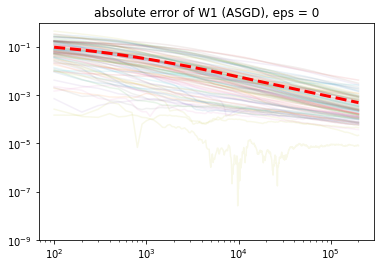

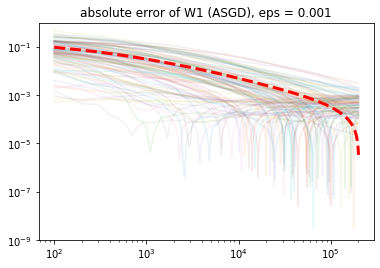

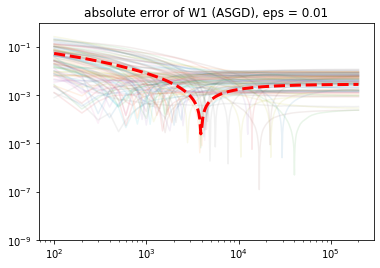

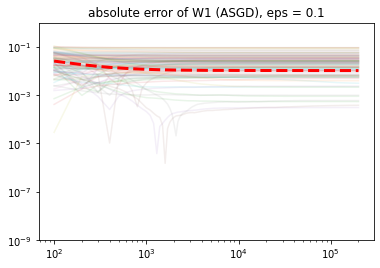

In [6]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    plt.figure()
    for seed in range(100):
        plt.plot(range(100,100+n_iter,100),np.abs(error_W1_all[seed,:,i_e]), alpha=0.1)
    plt.plot(range(100,100+n_iter,100),np.abs(error_W1_average_all[:,i_e]), alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.ylim((10**(-9),10**(0)))
    plt.title('absolute error of W1 (ASGD), eps = '+str(epsilon))
    plt.yscale('log')
    plt.xscale('log')
    plt.savefig('permanent/figure/S_discrete_eps_cst_ASGD/error_W1_eps_'+str(epsilon)+'.png')
    plt.show()
    plt.close()

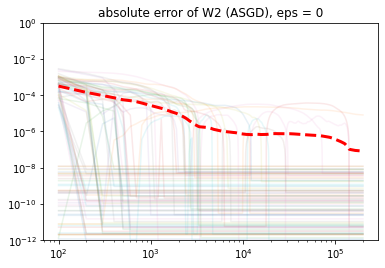

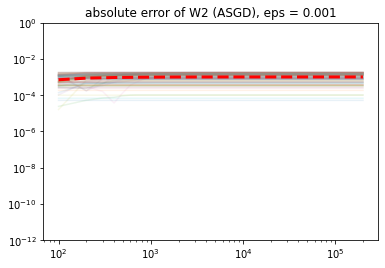

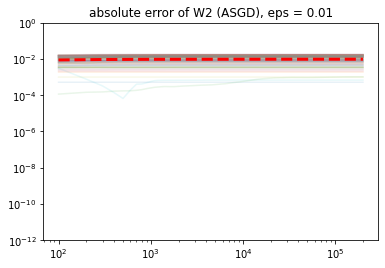

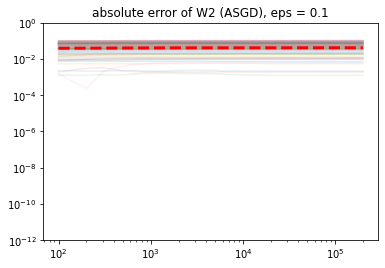

In [8]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    plt.figure()
    for seed in range(100):
        plt.plot(range(100,100+n_iter,100), np.abs(error_W2_all[seed,:,i_e]), alpha=0.1)
    plt.plot(range(100,100+n_iter,100),np.abs(error_W2_average_all[:,i_e]), alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.ylim((10**(-12),10**(0)))
    plt.title('absolute error of W2 (ASGD), eps = '+str(epsilon))
    plt.yscale('log')
    plt.xscale('log')
    plt.savefig('permanent/figure/S_discrete_eps_cst_ASGD/error_W2_eps_'+str(epsilon)+'.png')
    plt.show()
    plt.close()

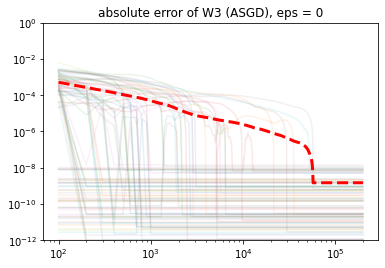

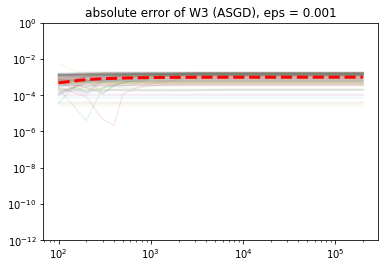

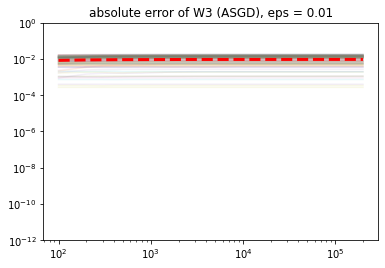

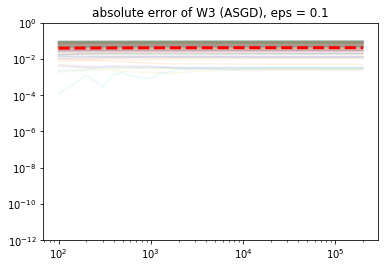

In [9]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    plt.figure()
    for seed in range(100):
        plt.plot(range(100,100+n_iter,100), np.abs(error_W3_all[seed,:,i_e]), alpha=0.1)
    plt.plot(range(100,100+n_iter,100),np.abs(error_W3_average_all[:,i_e]), alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.ylim((10**(-12),10**(0)))
    plt.title('absolute error of W3 (ASGD), eps = '+str(epsilon))
    plt.yscale('log')
    plt.xscale('log')
    plt.savefig('permanent/figure/S_discrete_eps_cst_ASGD/error_W3_eps_'+str(epsilon)+'.png')
    plt.show()
    plt.close()

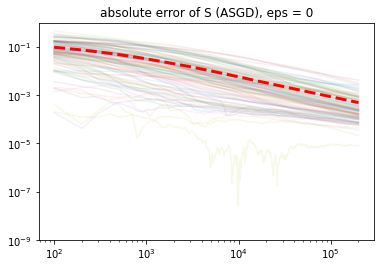

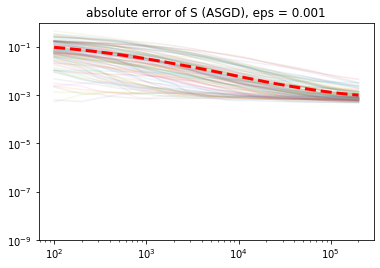

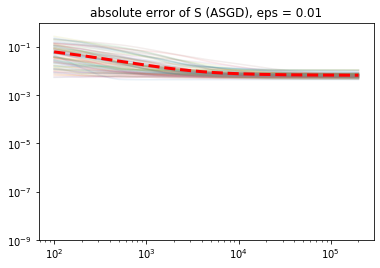

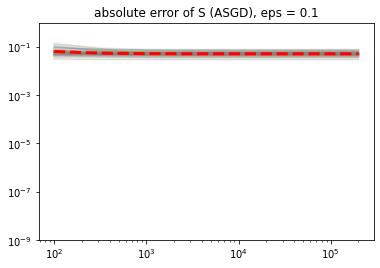

In [11]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    plt.figure()
    for seed in range(100):
        plt.plot(range(100,100+n_iter,100), np.abs(error_S_all[seed,:,i_e]), alpha=0.1)
    plt.plot(range(100,100+n_iter,100),np.abs(error_S_average_all[:,i_e]), alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.ylim((10**(-9),10**(0)))
    plt.title('absolute error of S (ASGD), eps = '+str(epsilon))
    plt.yscale('log')
    plt.xscale('log')
    plt.savefig('permanent/figure/S_discrete_eps_cst_ASGD/error_S_eps_'+str(epsilon)+'.png')
    plt.show()
    plt.close()

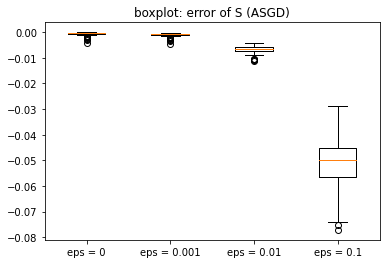

In [ ]:
plt.figure()
plt.boxplot(error_S_all[:,-1,:],labels=['eps = 0','eps = 0.001','eps = 0.01', 'eps = 0.1'])
plt.title('boxplot: error of S (ASGD)')
plt.savefig('permanent/figure/S_discrete_eps_cst_ASGD/error_S_boxplot.png')
plt.show()
plt.close()

In [ ]:
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


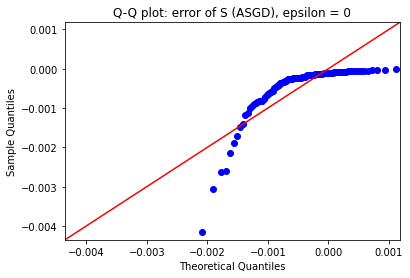

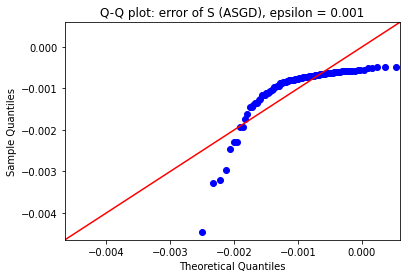

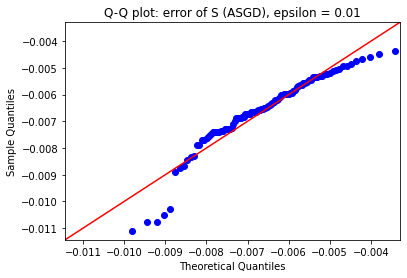

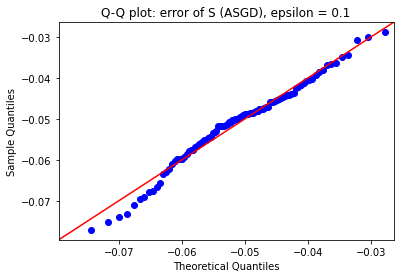

In [ ]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e] 
    std = np.std(error_S_all[:,-1,i_e])
    mean = np.mean(error_S_all[:,-1,i_e])
    fig = qqplot(error_S_all[:,-1,i_e], line='45', loc = mean, scale = std)
    plt.title('Q-Q plot: error of S (ASGD), epsilon = '+str(epsilon))
    plt.savefig('permanent/figure/S_discrete_eps_cst_ASGD/error_S_eps_'+str(epsilon)+'_qqplot.png')
    plt.show()
    plt.close()

# Regret

In [12]:
regret_S_all = (error_S_all**2).cumsum(axis = 1)
np.save('permanent/result/S_discrete_eps_cst_ASGD/regret_S_all.npy',regret_S_all)

In [13]:
regret_S_average_all = regret_S_all.mean(axis = 0)
np.save('permanent/result/S_discrete_eps_cst_ASGD/regret_S_average_all.npy',regret_S_average_all)

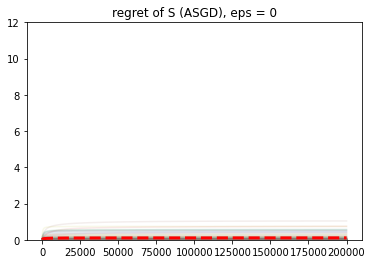

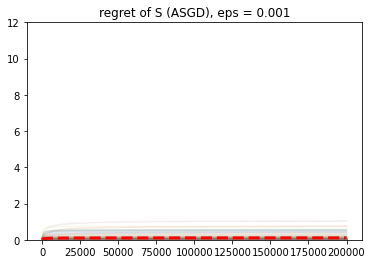

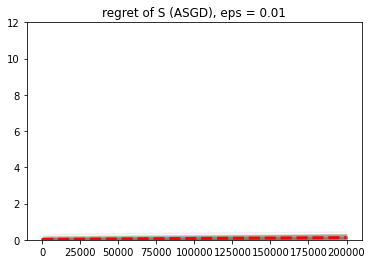

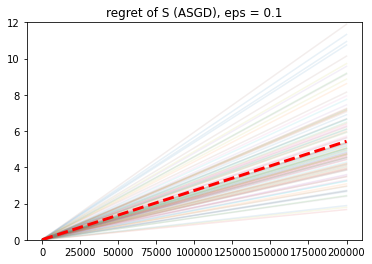

In [14]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    plt.figure()
    for seed in range(100):
        plt.plot(range(100,100+n_iter,100),regret_S_all[seed,:,i_e], alpha=0.1)
    plt.plot(range(100,100+n_iter,100),regret_S_average_all[:,i_e], alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.ylim((0,12))
    plt.title('regret of S (ASGD), eps = '+str(epsilon))
    plt.savefig('permanent/figure/S_discrete_eps_cst_ASGD/regret_S_non_log_eps_'+str(epsilon)+'.png')
    plt.show()
    plt.close()

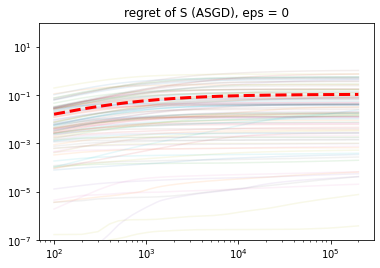

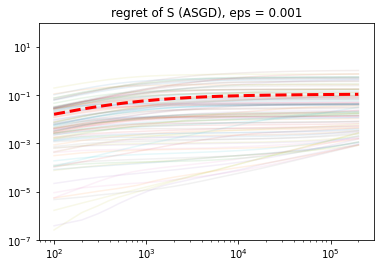

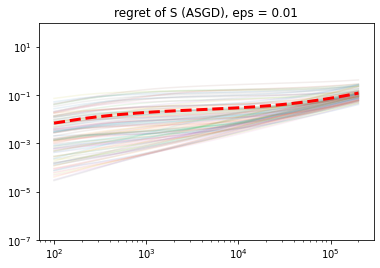

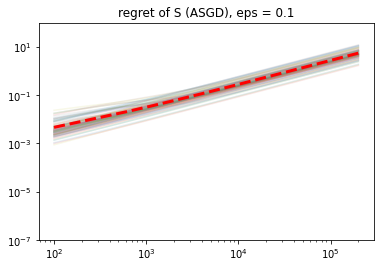

In [17]:
for i_e in range(len(list_epsilon)):
    epsilon = list_epsilon[i_e]
    plt.figure()
    for seed in range(100):
        plt.plot(range(100,100+n_iter,100),regret_S_all[seed,:,i_e], alpha=0.1)
    plt.plot(range(100,100+n_iter,100),regret_S_average_all[:,i_e], alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.ylim((10**(-7),10**(2)))
    plt.title('regret of S (ASGD), eps = '+str(epsilon))
    plt.yscale('log')
    plt.xscale('log')
    plt.savefig('permanent/figure/S_discrete_eps_cst_ASGD/regret_S_eps_'+str(epsilon)+'.png')
    plt.show()
    plt.close()